In [1]:
import numpy as np
import netCDF4 as nc
import f90nml
import os
import matplotlib.pyplot as plt
from salishsea_tools import bio_tools as bio
from salishsea_tools import visualisations
from matplotlib.colors import LinearSegmentedColormap
import cmocean
import glob
from matplotlib import animation, rc
%matplotlib inline

In [2]:
rc('animation', html='html5')

In [3]:
bathy = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')

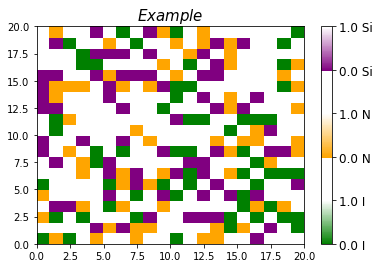

In [4]:
vmax = 5.0
cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'green'),
                                                    (1 / vmax, 'white'),
                                                    (1.99 / vmax, 'white'),
                                                    (2 / vmax, 'orange'),
                                                    (3 / vmax, 'white'),
                                                    (3.99 / vmax, 'white'),
                                                    (4 / vmax, 'purple'),
                                                    (5 / vmax, 'white')]
                                        )
fig, ax = plt.subplots()
mesh1 = ax.pcolormesh(np.random.randint(0,6, size=(20,20)), cmap = cmap)
ticks = [0,1,2,3,4,5]
cbar1 = fig.colorbar(mesh1, ax=ax)
cbar1.set_ticks([0,1,2,3,4,5])
cbar1.set_ticklabels(['0.0 I', '1.0 I', '0.0 N', '1.0 N', '0.0 Si', '1.0 Si'])
ax.set_title('$Example$', fontsize =15)
cbar1.ax.tick_params(labelsize = 12)

In [5]:
Jan15paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*jan15'))
Feb15paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*feb15'))
Mar15paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*mar15'))
Apr15paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*apr15'))
May15paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*may15'))
Jun15paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*jun15'))
Jul15paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*jul15'))
Aug15paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*aug15'))
Sep15paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*sep15'))
Oct15paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*oct15'))
paths15 = (Jan15paths + Feb15paths + Mar15paths + Apr15paths + May15paths + Jun15paths 
           + Jul15paths + Aug15paths + Sep15paths + Oct15paths)

In [6]:
Jan16paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*jan16'))
Feb16paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*feb16'))
Mar16paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*mar16'))
Apr16paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*apr16'))
May16paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*may16'))
Jun16paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*jun16'))
Jul16paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*jul16'))
Aug16paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*aug16'))
Sep16paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*sep16'))
Oct16paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*oct16'))
paths16 = (Jan16paths + Feb16paths + Mar16paths + Apr16paths + May16paths + Jun16paths 
           + Jul16paths + Aug16paths + Sep16paths + Oct16paths)

In [7]:
Jan17paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*jan17'))
Feb17paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*feb17'))
Mar17paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*mar17'))
Apr17paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*apr17'))
May17paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*may17'))
Jun17paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*jun17'))
Jul17paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*jul17'))
Aug17paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*aug17'))
Sep17paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*sep17'))
Oct17paths = sorted(glob.glob('/results/SalishSea/nowcast-green/*oct17'))
paths17 = (Jan17paths + Feb17paths + Mar17paths + Apr17paths + May17paths + Jun17paths 
           + Jul17paths + Aug17paths + Sep17paths + Oct17paths)

In [8]:
list_nampisprod15 = np.array([])
list_nampisprod16 = np.array([])
list_nampisprod17 = np.array([])
nampisprod15=bio.load_nml_bio('/results/SalishSea/nowcast-green/28dec14','nampisprod',
                    namRefDir='/data/vdo/MEOPAR/NEMO-3.6-code/NEMOGCM/CONFIG/SMELT/EXP00/')
nampisprod16=bio.load_nml_bio('/results/SalishSea/nowcast-green/23dec15','nampisprod',
                    namRefDir='/data/vdo/MEOPAR/NEMO-3.6-code/NEMOGCM/CONFIG/SMELT/EXP00/')
nampisprod17=bio.load_nml_bio('/results/SalishSea/nowcast-green/27dec16','nampisprod',
                    namRefDir='/data/vdo/MEOPAR/NEMO-3.6-code/NEMOGCM/CONFIG/SMELT/EXP00/')
for path15, path16, path17 in zip(paths15[:300], paths16[:300], paths17[:300]):
    try:
        nampisprod15=bio.load_nml_bio(path15,'nampisprod',
                    namRefDir='/data/vdo/MEOPAR/NEMO-3.6-code/NEMOGCM/CONFIG/SMELT/EXP00/')
        list_nampisprod15 = np.append(list_nampisprod15, nampisprod15)
    except FileNotFoundError:
        nampisprod15 = nampisprod15
        list_nampisprod15 = np.append(list_nampisprod15, nampisprod15)
    try:
        nampisprod16=bio.load_nml_bio(path16,'nampisprod',
                        namRefDir='/data/vdo/MEOPAR/NEMO-3.6-code/NEMOGCM/CONFIG/SMELT/EXP00/')
        list_nampisprod16 = np.append(list_nampisprod16, nampisprod16)
    except FileNotFoundError:
        nampisprod16 = nampisprod16
        list_nampisprod16 = np.append(list_nampisprod16, nampisprod16)
    try:
        nampisprod17=bio.load_nml_bio(path17,'nampisprod',
                        namRefDir='/data/vdo/MEOPAR/NEMO-3.6-code/NEMOGCM/CONFIG/SMELT/EXP00/')
        list_nampisprod17 = np.append(list_nampisprod17, nampisprod17)
    except FileNotFoundError:
        nampisprod17 = nampisprod17
        list_nampisprod17 = np.append(list_nampisprod17, nampisprod17)        

In [9]:
mesh = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
tmask = mesh.variables['tmask'][:]

In [10]:
list_of_ptrc15 = np.array([])
list_of_dia15 =np.array([])
list_of_ptrc16 = np.array([])
list_of_dia16 = np.array([])
list_of_ptrc17 = np.array([])
list_of_dia17 = np.array([])
for path in paths15:
    os.chdir(path)
    list_of_ptrc15 = np.append(list_of_ptrc15, os.path.join(path, glob.glob('*1h*ptrc_T*')[0]))
    list_of_dia15 = np.append(list_of_dia15, os.path.join(path, glob.glob('*2h*dia1_T*')[0]))
for path in paths16:
    os.chdir(path)
    list_of_ptrc16 = np.append(list_of_ptrc16, os.path.join(path, glob.glob('*1h*ptrc_T*')[0]))
    list_of_dia16 = np.append(list_of_dia16, os.path.join(path, glob.glob('*2h*dia1_T*')[0]))
for path in paths17:
    os.chdir(path)
    list_of_ptrc17 = np.append(list_of_ptrc17, os.path.join(path, glob.glob('*1h*ptrc_T*')[0]))
    list_of_dia17 = np.append(list_of_dia17, os.path.join(path, glob.glob('*2h*dia1_T*')[0]))

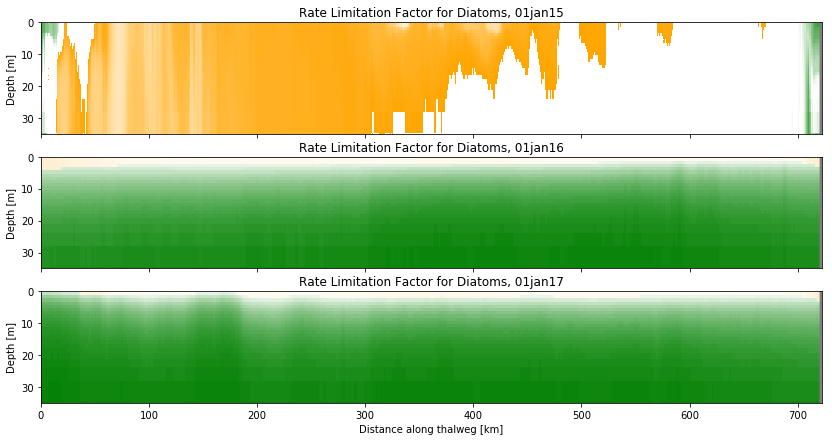

In [12]:
fig, ax = plt.subplots(3,1,figsize = (14,7))
a = np.arange(0,1,0.02)
def animate30(i):
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    nampisprod=list_nampisprod15[i]
    fdia15=nc.Dataset(list_of_dia15[i])
    fptc15=nc.Dataset(list_of_ptrc15[i])
    I15=fdia15.variables['PAR'][9,:,:,:]
    NO15= (fptc15.variables['nitrate'][19,:,:,:] + fptc15.variables['nitrate'][18,:,:,:]) * 0.5
    NH15= (fptc15.variables['ammonium'][19,:,:,:] + fptc15.variables['ammonium'][18,:,:,:]) * 0.5
    Si15= (fptc15.variables['silicon'][19,:,:,:] + fptc15.variables['silicon'][18,:,:,:]) * 0.5
    #D15,M15,N15 = bio.calc_p_limiters(I15,NO15,NH15,Si15,tmask[0,:,:,:],nampisprod)
    cbar1 = visualisations.contour_thalweg(ax[0], NH15, bathy, mesh, 
                                       cmap = cmap, method='pcolormesh',land_colour='gray',
                                       mesh_args={'vmin':0, 'vmax':5})
    ax[0].set_ylim(35,0)
    nampisprod=list_nampisprod16[i]
    fdia16=nc.Dataset(list_of_dia16[i])
    fptc16=nc.Dataset(list_of_ptrc16[i])
    I16=fdia16.variables['PAR'][9,:,:,:]
    NO16= (fptc16.variables['nitrate'][19,:,:,:] + fptc16.variables['nitrate'][18,:,:,:]) * 0.5
    NH16= (fptc16.variables['ammonium'][19,:,:,:] + fptc16.variables['ammonium'][18,:,:,:]) * 0.5
    Si16= (fptc16.variables['silicon'][19,:,:,:] + fptc16.variables['silicon'][18,:,:,:]) * 0.5
    D16,M16,N16 = bio.calc_p_limiters(I16,NO16,NH16,Si16,tmask[0,:,:,:],nampisprod)
    cbar2 = visualisations.contour_thalweg(ax[1], D16['limval'], bathy, mesh, 
                                       cmap = cmap, method='pcolormesh',land_colour='gray',
                                       mesh_args={'vmin':0, 'vmax':5})
    ax[1].set_ylim(35, 0)
    
    nampisprod=list_nampisprod17[i]
    fdia17=nc.Dataset(list_of_dia17[i])
    fptc17=nc.Dataset(list_of_ptrc17[i])
    I17=fdia17.variables['PAR'][9,:,:,:]
    NO17= (fptc17.variables['nitrate'][19,:,:,:] + fptc17.variables['nitrate'][18,:,:,:]) * 0.5
    NH17= (fptc17.variables['ammonium'][19,:,:,:] + fptc17.variables['ammonium'][18,:,:,:]) * 0.5
    Si17= (fptc17.variables['silicon'][19,:,:,:] + fptc17.variables['silicon'][18,:,:,:]) * 0.5
    D17,M17,N17 = bio.calc_p_limiters(I17,NO17,NH17,Si17,tmask[0,:,:,:],nampisprod)
    cbar3 = visualisations.contour_thalweg(ax[2], D17['limval'], bathy, mesh, 
                                       cmap = cmap, method='pcolormesh',land_colour='gray',
                                       mesh_args={'vmin':0, 'vmax':5})
    ax[2].set_ylim(35,0)
    ax[0].set_title('Rate Limitation Factor for Diatoms, ' + paths15[i][-7:])
    ax[1].set_title('Rate Limitation Factor for Diatoms, ' + paths16[i][-7:])
    ax[2].set_title('Rate Limitation Factor for Diatoms, ' + paths17[i][-7:])
    cbar1.tick_params(labelbottom = False)
    cbar2.tick_params(labelbottom = False)
    cbar3.set_xlabel('Distance along thalweg [km]')

interval = 0.25#in seconds
ani40 = animation.FuncAnimation(fig,animate30,frames=299,interval=interval*1e+3, 
                                repeat=False)
ani40